Clustering with PCA

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('data.csv')
print(data.shape)
print(data.head())

(42000, 785)
   label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7   
0      1       0       0       0       0       0       0       0       0  \
1      0       0       0       0       0       0       0       0       0   
2      1       0       0       0       0       0       0       0       0   
3      4       0       0       0       0       0       0       0       0   
4      0       0       0       0       0       0       0       0       0   

   pixel8  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779   
0       0  ...         0         0         0         0         0         0  \
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0         0         0         0   
3       0  ...         0         0         0         0         0         0   
4       0  ...         0         0         0         0         0         0   

   pixel780  pixel781  pixel782  pixel783  
0         0      

In [2]:
data_array = np.array(data)
print(data_array.shape)

X = data_array[:, 1:].T
Y = data_array[:, 0]
print(X.shape, Y.shape)

(42000, 785)
(784, 42000) (42000,)


In [3]:
num1 = 3
num2 = 6
num3 = 9

idx = (Y[:] == num1) | (Y[:] == num2) | (Y[:] == num3)

X = X[:, idx]
Y = Y[idx]
print(X.shape, Y.shape)

(784, 12676) (12676,)


In [4]:
def train_test_split(X,Y,N_train):
    d, N = X.shape
    #define the array of indices
    idx = np.arange(0,N)
    
    #shuffle the indices
    np.random.shuffle(idx)
    
    #extract train and test indices
    train_idx = idx[:N_train]
    test_idx = idx[N_train:]
    
    #extract data
    X_train = X[:, train_idx]
    Y_train = Y[train_idx]
    
    X_test = X[:, test_idx]
    Y_test = Y[test_idx]

    return (X_train, Y_train), (X_test, Y_test)

In [5]:
N_train = 8000
(X_train, Y_train), (X_test, Y_test) = train_test_split(X, Y, N_train)

print(X_train.shape, X_test.shape)
print(Y_train.shape, Y_test.shape)

(784, 8000) (784, 4676)
(8000,) (4676,)


In [6]:
def centroid(X):
    return np.mean(X, axis=1, keepdims=True)

CX = centroid(X_train)
print(CX.shape)

# Center the dataset
Xc = X_train - CX
print(np.linalg.norm(centroid(Xc),2))

# Compute PCA of X_train with k = 2
U,s,VT = np.linalg.svd(Xc, full_matrices = False)

k = 2
U_k = U[:, :k]
Z_k = U_k.T @ Xc
print(Z_k.shape)

idx1 = Y_train[:] == num1
idx2 = Y_train[:] == num2
idx3 = Y_train[:] == num3

Xc1 = Xc[:, idx1]
Xc2 = Xc[:, idx2]
Xc3 = Xc[:, idx3]

Z_k1 = Z_k[:, idx1]
Z_k2 = Z_k[:, idx2]
Z_k3 = Z_k[:, idx3]

C_k1 = np.reshape(np.mean(Z_k1, axis=1),(2,1))
C_k2 = np.reshape(np.mean(Z_k2, axis=1),(2,1))
C_k3 = np.reshape((np.mean(Z_k3, axis=1)),(2,1))

(784, 1)
1.4817588995350117e-12
(2, 8000)


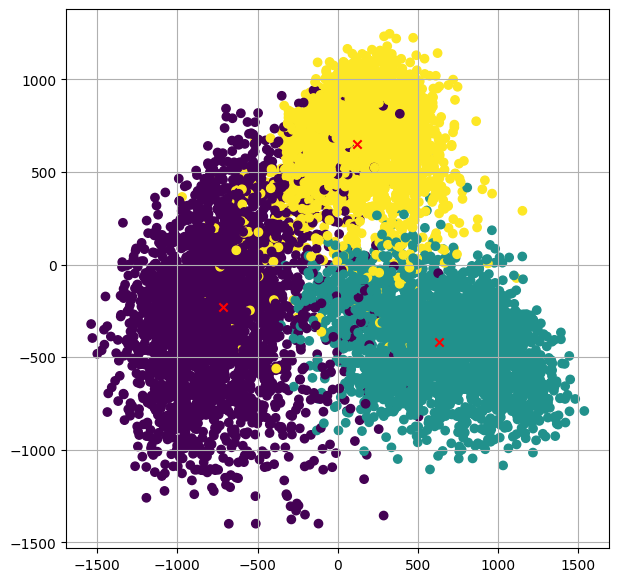

In [7]:
#visualize the points and the centroids
plt.figure(figsize=(7, 7))
plt.scatter(Z_k[0,:], Z_k[1,:], c = Y_train[:])
plt.scatter(C_k1[0,:], C_k1[1,:], c = "r", marker='x')
plt.scatter(C_k2[0,:], C_k2[1,:], c = "r", marker='x')
plt.scatter(C_k3[0,:], C_k3[1,:], c = "r", marker='x')
plt.grid()
plt.show()

In [8]:
##### AVERAGE DISTANCE OF CLUSTERS TO CENTROID #####
def average_distance_to_centroid(Z_k, C_k):
    d, N = Z_k.shape
    dist = 0
    for i in range(N):
        dist += np.linalg.norm(Z_k[:, i] - C_k, 2)
    return dist/N

d1 = average_distance_to_centroid(Z_k1, C_k1)
d2 = average_distance_to_centroid(Z_k2, C_k2)
d3 = average_distance_to_centroid(Z_k3, C_k3)
print('Average distance of cluster 1 to centroid 1: ', d1)
print('Average distance of cluster 2 to centroid 2: ', d2)
print('Average distance of cluster 3 to centroid 3: ', d3)

Average distance of cluster 1 to centroid 1:  910.3463987544986
Average distance of cluster 2 to centroid 2:  1333.8120349290812
Average distance of cluster 3 to centroid 3:  790.3925517798625


In [9]:
##### AVERAGE DISTANCE OF CLUSTERS TO CENTROID IN TEST SET #####
def average_distance_to_centroid2(X, Y, C1, C2, C3):
    idx1 = (Y[:] == num1)
    idx2 = (Y[:] == num2)
    idx3 = (Y[:] == num3)

    X1 = X[:, idx1]
    X2 = X[:, idx2]
    X3 = X[:, idx3]
    
    avg_dist1 = average_distance_to_centroid(X1, C1)
    avg_dist2 = average_distance_to_centroid(X2, C2)
    avg_dist3 = average_distance_to_centroid(X3, C3)

    return avg_dist1, avg_dist2, avg_dist3

U, s, VT = np.linalg.svd(X_test, full_matrices = False)
k = 2
U_k_test = U[:, :k]
Z_k_test = U_k_test.T @ X_test
avg_dist1, avg_dist2, avg_dist3 = average_distance_to_centroid2(Z_k_test, Y_test, C_k1, C_k2, C_k3)
print("Average distance of test set to centroid 1:", avg_dist1)
print("Average distance of test set to centroid 2:", avg_dist2)
print("Average distance of test set to centroid 3:", avg_dist3)


Average distance of test set to centroid 1: 1817.0260463719023
Average distance of test set to centroid 2: 2665.400148489955
Average distance of test set to centroid 3: 2816.15894485272


In [10]:
def centroid(X):
    return np.mean(X, axis=1)

def classificationAlgo(C1, C2, C3, x):
    dist1 = np.linalg.norm(x - C1)
    dist2 = np.linalg.norm(x - C2)
    dist3 = np.linalg.norm(x - C3)
    minDist = min(dist1, dist2, dist3)
    if minDist == dist1:
        return num1
    if minDist == dist2:
        return num2
    if minDist == dist3:
        return num3

counter = 0

C1 = centroid(Xc1)
C2 = centroid(Xc2)
C3 = centroid(Xc3)

for i in range(Y_test.shape[0]):
    c = classificationAlgo(C1, C2, C3, X_test[:, i])
    if c == Y_test[i]:
        counter += 1
        
print(f"Accuracy: {counter*100/len(Y_test)} %")

Accuracy: 94.803250641574 %


In [11]:
k = 3

def centroid(X):
    return np.mean(X, axis=1, keepdims=True)

(X_train, Y_train), (X_test, Y_test) = train_test_split(X, Y, N_train)
CX = centroid(X_train)
Xc = X_train - CX
U, s, VT = np.linalg.svd(Xc, full_matrices=False)

idx1 = Y_train[:] == num1
idx2 = Y_train[:] == num2
idx3 = Y_train[:] == num3
Xc1 = Xc[:, idx1]
Xc2 = Xc[:, idx2]
Xc3 = Xc[:, idx3]
C1 = centroid(Xc1)
C2 = centroid(Xc2)
C3 = centroid(Xc3)

U_k = U[:, :k]
Z_k = U_k.T @ Xc

Z_k1 = Z_k[:, idx1]
Z_k2 = Z_k[:, idx2]
Z_k3 = Z_k[:, idx3]

C_k1 = np.reshape(np.mean(Z_k1, axis=1), (k,1))
C_k2 = np.reshape(np.mean(Z_k2, axis=1), (k,1))
C_k3 = np.reshape(np.mean(Z_k3, axis=1), (k,1))

counter = 0

for i in range(Y_test.shape[0]):
    c = classificationAlgo(C1, C2, C3, X_test[:, i])
    if c == Y_test[i]:
        counter += 1
        
print(f"Accuracy: {counter*100/len(Y_test)} %")

Accuracy: 34.40975192472199 %


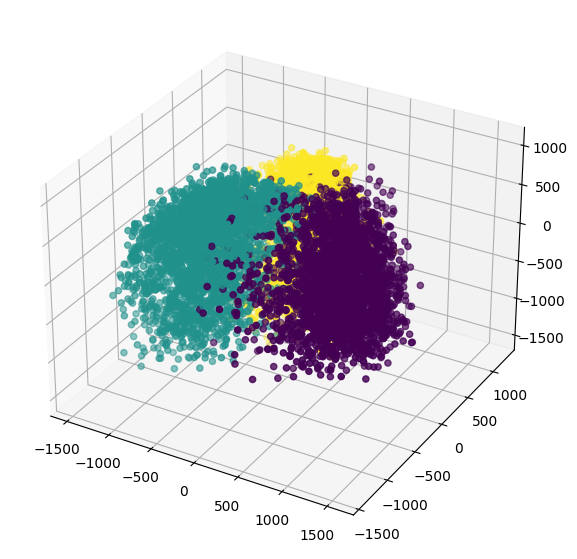

In [12]:
fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(projection='3d')
ax.scatter(Z_k[0,:], Z_k[1,:], Z_k[2,:], c = Y_train[:])
plt.show()

In [13]:
k = 5

def centroid(X):
    return np.mean(X, axis=1, keepdims=True)

(X_train, Y_train), (X_test, Y_test) = train_test_split(X, Y, N_train)
CX = centroid(X_train)
Xc = X_train - CX
U,s,VT = np.linalg.svd(Xc, full_matrices=False)

idx1 = Y_train[:] == num1
idx2 = Y_train[:] == num2
idx3 = Y_train[:] == num3
Xc1 = Xc[:, idx1]
Xc2 = Xc[:, idx2]
Xc3 = Xc[:, idx3]
C1 = centroid(Xc1)
C2 = centroid(Xc2)
C3 = centroid(Xc3)

U_k = U[:, :k]
Z_k = U_k.T @ Xc

Z_k1 = Z_k[:, idx1]
Z_k2 = Z_k[:, idx2]
Z_k3 = Z_k[:, idx3]

C_k1 = np.reshape(np.mean(Z_k1, axis=1), (k,1))
C_k2 = np.reshape(np.mean(Z_k2, axis=1), (k,1))
C_k3 = np.reshape(np.mean(Z_k3, axis=1), (k,1))

counter = 0

for i in range(Y_test.shape[0]):
    c = classificationAlgo(C1, C2, C3, X_test[:, i])
    if c == Y_test[i]:
        counter += 1
        
print(f"Accuracy: {counter*100/len(Y_test)} %")

Accuracy: 34.302822925577416 %


In [14]:
k = 10

def centroid(X):
    return np.mean(X, axis=1, keepdims=True)

(X_train, Y_train), (X_test, Y_test) = train_test_split(X, Y, N_train)
CX = centroid(X_train)
Xc = X_train - CX
U,s,VT = np.linalg.svd(Xc, full_matrices=False)

idx1 = Y_train[:] == num1
idx2 = Y_train[:] == num2
idx3 = Y_train[:] == num3
Xc1 = Xc[:, idx1]
Xc2 = Xc[:, idx2]
Xc3 = Xc[:, idx3]
C1 = centroid(Xc1)
C2 = centroid(Xc2)
C3 = centroid(Xc3)

U_k = U[:, :k]
Z_k = U_k.T @ Xc

Z_k1 = Z_k[:, idx1]
Z_k2 = Z_k[:, idx2]
Z_k3 = Z_k[:, idx3]

C_k1 = np.reshape(np.mean(Z_k1, axis=1), (k,1))
C_k2 = np.reshape(np.mean(Z_k2, axis=1), (k,1))
C_k3 = np.reshape(np.mean(Z_k3, axis=1), (k,1))

counter = 0

for i in range(Y_test.shape[0]):
    c = classificationAlgo(C1, C2, C3, X_test[:, i])
    if c == Y_test[i]:
        counter += 1
        
print(f"Accuracy: {counter*100/len(Y_test)} %")

Accuracy: 33.960650128314796 %
